In [3]:
import pickle
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from inference import predict 

In [13]:
df_test = pd.read_csv('../test_dataset.txt', sep = '\t')

In [14]:
df_test.shape

(19989, 1)

In [15]:
texts = df_test['name'].sample(200000, replace=True).to_numpy()
predict(texts)

array(['NOT', 'NOT', 'NOT', ..., 'NOT', 'NOT', 'NOT'], dtype=object)

In [19]:
import time
import tqdm

n_list = [100, 1000, 10000, 20000, 100000, 500000, 1000000, 2000000]
time_list = []
for n in tqdm.tqdm_notebook(n_list):
    print(n)
    texts = df_test['name'].sample(n, replace=True).to_numpy()
    delta = time.time()
    _ = predict(texts)
    delta = time.time()-delta
    time_list.append(delta)

100
1000
10000
20000
100000
500000
1000000
2000000



#### 100Е6 на macboock air будут считаться 40 минут
#### 1000Е6 на macboock air будут считаться 6 часов

В принципе, это удоволетворительный результат для демона, который может работать раз в день ночью

Посмотрим как его можно оптемизировать

1000
10000
20000
100000
500000
1000000
2000000



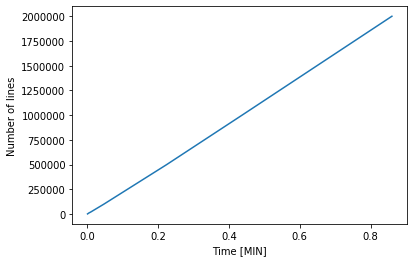

In [11]:
simple_preprocessor = lambda x:x
import time
import tqdm

n_list = [1000, 10000, 20000, 100000, 500000, 1000000, 2000000]
time_list = []
for n in tqdm.tqdm_notebook(n_list):
    print(n)
    texts = df_test['name'].sample(n, replace=True).to_numpy()
    delta = time.time()
    _ = predict(texts)
    delta = time.time()-delta
    time_list.append(delta)
    
time_list = np.array(time_list)/60

plt.plot(time_list, n_list)
plt.xlabel('Time [MIN]')
plt.ylabel('Number of lines')
k = (time_list)[-1] / n_list[-1]
task = 100e6
plt.scatter([task*k], [task], marker = 'X', s = 200)


In [82]:
texts = df_test['name'].sample(100000, replace=True).to_numpy()

In [83]:
# %prun _ = predict(texts)
     3993659 function calls in 3.627 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    1.078    0.539    3.431    1.716 text.py:952(_count_vocab)
   101052    0.848    0.000    1.331    0.000 text.py:148(_word_ngrams)
   101052    0.381    0.000    0.381    0.000 {method 'findall' of 're.Pattern' objects}
  1088050    0.307    0.000    0.307    0.000 {method 'join' of 'str' objects}
        2    0.190    0.095    0.190    0.095 {sklearn.svm.libsvm_sparse.libsvm_sparse_predict}
   101052    0.158    0.000    2.228    0.000 text.py:351(<lambda>)
  1189104    0.139    0.000    0.139    0.000 {method 'append' of 'list' objects}
   101052    0.085    0.000    0.085    0.000 {method 'lower' of 'str' objects}
   101052    0.079    0.000    0.227    0.000 utils.py:21(simple_preprocessor)
   101052    0.070    0.000    0.093    0.000 text.py:122(decode)
   202104    0.062    0.000    0.062    0.000 {method 'replace' of 'str' objects}
   100000    0.039    0.000    0.039    0.000 {built-in method builtins.min}
   101052    0.039    0.000    0.419    0.000 text.py:265(<lambda>)
   101052    0.029    0.000    0.029    0.000 {method 'extend' of 'array.array' objects}
   201124    0.028    0.000    0.028    0.000 {built-in method builtins.len}
   101052    0.025    0.000    0.025    0.000 {method 'extend' of 'list' objects}
   101096    0.023    0.000    0.023    0.000 {built-in method builtins.isinstance}
   101052    0.016    0.000    0.016    0.000 {method 'keys' of 'dict' objects}
   101052    0.015    0.000    0.015    0.000 {method 'values' of 'dict' objects}
       52    0.010    0.000    0.010    0.000 {built-in method numpy.array}
        1    0.003    0.003    3.627    3.627 <ipython-input-32-77fcf7a35658>:1(predict)
        2    0.002    0.001    0.002    0.001 {method 'take' of 'numpy.ndarray' objects}
        2    0.001    0.001    0.001    0.001 {built-in method scipy.sparse._sparsetools.csr_sort_indices}
        4    0.000    0.000    0.000    0.000 {built-in method scipy.sparse._sparsetools.csr_has_sorted_indices}
        2    0.000    0.000    0.000    0.000 {built-in method scipy.sparse._sparsetools.csr_has_canonical_format}
        4    0.000    0.000    0.000    0.000 compressed.py:138(check_format)
       19    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        8    0.000    0.000    0.000    0.000 sputils.py:120(get_index_dtype)
        4    0.000    0.000    0.000    0.000 {method 'copy' of 'numpy.ndarray' objects}
        4    0.000    0.000    0.001    0.000 compressed.py:30(__init__)
        2    0.000    0.000    0.190    0.095 base.py:348(_sparse_predict)
       16    0.000    0.000    0.000    0.000 getlimits.py:497(__init__)
        2    0.000    0.000    3.625    1.812 metaestimators.py:116(<lambda>)
        2    0.000    0.000    0.193    0.097 base.py:558(predict)
       36    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
        1    0.000    0.000    3.627    3.627 {built-in method builtins.exec}
        2    0.000    0.000    0.000    0.000 validation.py:36(_assert_all_finite)
        2    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        2    0.000    0.000    0.001    0.001 base.py:450(_validate_for_predict)
        4    0.000    0.000    0.000    0.000 compressed.py:1139(prune)
        2    0.000    0.000    0.000    0.000 {method 'astype' of 'numpy.ndarray' objects}
        2    0.000    0.000    3.625    1.812 pipeline.py:397(predict)
       38    0.000    0.000    0.010    0.000 _asarray.py:16(asarray)
        4    0.000    0.000    0.000    0.000 sputils.py:266(check_shape)
        2    0.000    0.000    0.001    0.000 validation.py:332(check_array)
        4    0.000    0.000    0.000    0.000 compressed.py:1099(__get_sorted)
        4    0.000    0.000    0.000    0.000 sputils.py:209(isshape)
        2    0.000    0.000    3.431    1.716 text.py:1085(transform)
        2    0.000    0.000    0.000    0.000 validation.py:581(_check_large_sparse)
       16    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(can_cast)
        2    0.000    0.000    0.000    0.000 metaestimators.py:99(__get__)
       10    0.000    0.000    0.000    0.000 base.py:674(__getattr__)
        2    0.000    0.000    0.000    0.000 functools.py:37(update_wrapper)
        4    0.000    0.000    0.000    0.000 pipeline.py:195(_iter)
        2    0.000    0.000    0.000    0.000 {built-in method numpy.frombuffer}
        4    0.000    0.000    0.000    0.000 validation.py:866(check_is_fitted)
       30    0.000    0.000    0.000    0.000 {built-in method builtins.getattr}
        2    0.000    0.000    0.001    0.000 validation.py:234(_ensure_sparse_format)
       16    0.000    0.000    0.000    0.000 compressed.py:110(getnnz)
        2    0.000    0.000    0.000    0.000 compressed.py:1195(_with_data)
        2    0.000    0.000    0.001    0.000 data.py:67(astype)
        4    0.000    0.000    0.000    0.000 base.py:70(__init__)
        2    0.000    0.000    0.000    0.000 compressed.py:1054(__get_has_canonical_format)
        2    0.000    0.000    0.000    0.000 text.py:330(build_analyzer)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:73(_wrapreduction)
        8    0.000    0.000    0.000    0.000 getlimits.py:508(min)
        4    0.000    0.000    0.001    0.000 compressed.py:1130(sort_indices)
        4    0.000    0.000    0.000    0.000 sputils.py:92(to_native)
       22    0.000    0.000    0.000    0.000 base.py:84(get_shape)
       16    0.000    0.000    0.000    0.000 base.py:242(nnz)
        2    0.000    0.000    0.000    0.000 extmath.py:663(_safe_accumulator_op)
        2    0.000    0.000    0.000    0.000 {built-in method _abc._abc_instancecheck}
        2    0.000    0.000    0.000    0.000 fromnumeric.py:2045(sum)
       10    0.000    0.000    0.000    0.000 base.py:1189(isspmatrix)
       12    0.000    0.000    0.000    0.000 sputils.py:279(<genexpr>)
        2    0.000    0.000    0.191    0.096 base.py:307(predict)
        4    0.000    0.000    0.000    0.000 numerictypes.py:293(issubclass_)
        8    0.000    0.000    0.000    0.000 _util.py:129(_prune_array)
        4    0.000    0.000    0.000    0.000 data.py:22(__init__)
        2    0.000    0.000    0.000    0.000 validation.py:131(_num_samples)
        2    0.000    0.000    0.000    0.000 text.py:1161(_make_int_array)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:416(parent)
       16    0.000    0.000    0.000    0.000 multiarray.py:469(can_cast)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(sum)
        4    0.000    0.000    0.000    0.000 {method 'newbyteorder' of 'numpy.dtype' objects}
        2    0.000    0.000    0.000    0.000 text.py:386(_check_vocabulary)
        1    0.000    0.000    3.627    3.627 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 re.py:271(_compile)
       14    0.000    0.000    0.000    0.000 data.py:25(_get_dtype)
        2    0.000    0.000    0.000    0.000 pipeline.py:247(_final_estimator)
        4    0.000    0.000    0.000    0.000 {method 'index' of 'list' objects}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.max}
        2    0.000    0.000    0.000    0.000 {built-in method _abc._abc_subclasscheck}
        2    0.000    0.000    0.000    0.000 numerictypes.py:365(issubdtype)
        4    0.000    0.000    0.000    0.000 compressed.py:1114(__set_sorted)
        2    0.000    0.000    0.000    0.000 data.py:32(_deduped_data)
        2    0.000    0.000    0.000    0.000 validation.py:325(_ensure_no_complex_data)
        2    0.000    0.000    0.000    0.000 text.py:260(build_tokenizer)
        2    0.000    0.000    0.000    0.000 text.py:271(_check_stop_words_consistency)
       10    0.000    0.000    0.000    0.000 {built-in method builtins.setattr}
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1009(_handle_fromlist)
        2    0.000    0.000    0.000    0.000 abc.py:137(__instancecheck__)
        2    0.000    0.000    0.000    0.000 _config.py:13(get_config)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:74(<dictcomp>)
        8    0.000    0.000    0.000    0.000 getlimits.py:521(max)
        2    0.000    0.000    0.000    0.000 compressed.py:1075(__set_has_canonical_format)
        6    0.000    0.000    0.000    0.000 {built-in method builtins.issubclass}
        2    0.000    0.000    0.000    0.000 re.py:232(compile)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(where)
        4    0.000    0.000    0.000    0.000 base.py:252(getformat)
       12    0.000    0.000    0.000    0.000 csr.py:228(_swap)
        4    0.000    0.000    0.000    0.000 validation.py:913(<listcomp>)
        2    0.000    0.000    0.000    0.000 text.py:230(build_preprocessor)
        2    0.000    0.000    0.000    0.000 {method 'update' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'copy' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'rpartition' of 'str' objects}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.all}
        8    0.000    0.000    0.000    0.000 {built-in method _operator.index}
        2    0.000    0.000    0.000    0.000 _asarray.py:88(asanyarray)
        2    0.000    0.000    0.000    0.000 compressed.py:1083(sum_duplicates)
        2    0.000    0.000    0.000    0.000 text.py:106(_check_stop_list)
        2    0.000    0.000    0.000    0.000 text.py:267(get_stop_words)
        4    0.000    0.000    0.000    0.000 {built-in method builtins.callable}
        2    0.000    0.000    0.000    0.000 abc.py:141(__subclasscheck__)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        2    0.000    0.000    0.000    0.000 {method 'items' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.id}
        2    0.000    0.000    0.000    0.000 fromnumeric.py:2040(_sum_dispatcher)
        1    0.000    0.000    0.000    0.000 multiarray.py:312(where)

Что делать? (по степени усложнения)

    1) Распаралелить векторайзер
    2) Вместо двух векторайзеров оставить один
    3) Свой векторайзер (или версия быстрее sklearn-a)
    3) Свой SCV руками (будет быстрее, если не использовать преобразования с разряженными матрицами)
    4) Переписать все на cython (или си, go)
    5) Если есть кластер на hadoop/spark, переписать код на java/scale
    

In [2]:
def simple_preprocessor(s):
    return s.lower().replace('"', ' ').replace("''", ' ')

from inference import predict

In [3]:
predict_table()

In [12]:
# import pandas as pd
# import numpy as np
# a = pd.read_csv('../classified_dataset.txt', sep = '\t')
# b = pd.read_csv('classified_dataset.txt', sep = '\t')
# assert(np.mean(a['result'] == b['result'])==1)